# Tutorial 🐣


> ⚠️ **WARNING** <br> coredotfinance 의 함수들은 data.krx.co.kr 에서 데이터를 POST 방식으로 요청해서 받아오는 것이기 때문에<br> 무분별한 사용은 IP 차단이나 그 이상의 패널티를 얻을 수도 있다.

## 삼성전자 주식을 불러오자 using KrxReader 📈

지난 1년간의 삼성전자 주식을 불러오고
matplotlib을 이용해서 간단한 그래프를 그려 보는 것을 통해서 
coredotfinance의 사용법을 익혀보자

In [11]:
from coredotfinance.data import KrxReader
krx = KrxReader()

먼저 krx 인스턴스를 생성한다. <br>
다음 krx.read를 사용하기 위해서는 해당 종목의 symbol(종목코드)를 알아내야 한다.<br>
이때 krx.search()를 사용할 수 있다.

### search

search(symbol, kind='stock', \**kwargs)

- symbol : str

        찾고자 하는 데이터의 종목 코드
        
- kind : str
    
        찾고자 하는 데이터의 종류 

         'stock' : 주식
         'index': 지수
         'other_index' : 기타 지수         
         'etf': ETF
         'etn': ETN
         'elw': ELW


- devision : str

        기타 지수(other_index) 의 종류
        kind가 `other_index` 일때만 넣어준다
        ['선물지수', '전략지수', '옵션지주', '상품지수'] 
                


In [5]:
krx.search('삼성전자')

('삼성전자', 'KR7005930003', '005930')

search의 결과로 '종목명', '종목고유코드', '종목코드' 를 tuple 형식으로 받게 된다.

krx.read()를 사용하기 위해서는 종목코드만 있으면 된다.

### read



read(self, symbol, *, start=None, end=None, kind="stock", api=False, **kwargs)

해당 주식 가격 데이터를 시작일(start) 부터 종료일(end) 까지 읽어온다.

-    symbol : str

            조회하고자 하는 데이터의 종목코드.
            형태는 종목과 종류마다 다르다.
            예) 삼성전자 : '005930', ARIRANG 200 : '152100'
-    start : str

            조회하고자 하는 데이터의 시작일.
            형태는 YYYY-MM-DD가 되어야 한다. 
            예) 2021-06-01
-    end : str

            조회하고자 하는 데이터의 종료일.
            형태는 YYYY-MM-DD가 되어야 한다.
            예) 2021-06-01
-    kind : str, default "stock"

            조회하고자 하는 데이터의 종류.

             'stock' : 주식
             'per' : PER/EPS/배당금 등
             'index': 지수
             'other_index' : 기타 지수         
             'etf': ETF
             'etn': ETN
             'elw': ELW

-    kwargs


     - division : str
             
                조회하고자 하는 데이터의 세부 구분
                other_index : ['선물지수', '옵션지수', '전략지수', '상품지수']
     - reverse : bool, default false
             
                dataframe을 거꾸로 정렬하기
     - kor : bool, default false
             
                columns를 한글로 받아오기
     - adjust : bool, default false
             
                수정주가 적용하기




In [2]:
dataframe = krx.read('005930', start='2020-07-01', end='2021-07-01')
dataframe

삼성전자


,close,change,change_ratio,open,high,low,volume,trading_value,market_cap,shares_outstanding
2021-07-01,80100,-600,-0.74,80500,80600,80000,13382882,1073188213795,478179582255000,5969782550
2021-06-30,80700,-300,-0.37,81100,81400,80700,13288643,1075902355151,481761451785000,5969782550
2021-06-29,81000,-900,-1.10,81900,82100,80800,15744317,1277813841567,483552386550000,5969782550
2021-06-28,81900,300,0.37,81700,82000,81600,11578529,946992165410,488925190845000,5969782550
2021-06-25,81600,400,0.49,81500,81900,81200,13481405,1099148742353,487134256080000,5969782550
...,...,...,...,...,...,...,...,...,...,...
2020-07-07,53400,-1600,-2.91,55800,55900,53400,30760032,1672753640892,318786388170000,5969782550
2020-07-06,55000,1400,2.61,54000,55000,53800,19856623,1084003637100,328338040250000,5969782550
2020-07-03,53600,700,1.32,53000,53600,52700,11887868,633333112600,319980344680000,5969782550
2020-07-02,52900,300,0.57,52100,52900,52100,14142583,742668048500,315801496895000,5969782550


colum의 이름이 모두 영어로 되어 있다.

그 이유는 `cufflinks` 같은 라이브러리와 호환성을 이루기 위해서다.

만약 한글 colum이 필요하다면 ```kor=True``` 를 추가해주면 된다.

### kor=True

In [6]:
dataframe = krx.read('005930', start='2020-07-01', end='2021-07-01', kor=True)
dataframe

삼성전자


,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
2021-07-01,80100,-600,-0.74,80500,80600,80000,13382882,1073188213795,478179582255000,5969782550
2021-06-30,80700,-300,-0.37,81100,81400,80700,13288643,1075902355151,481761451785000,5969782550
2021-06-29,81000,-900,-1.10,81900,82100,80800,15744317,1277813841567,483552386550000,5969782550
2021-06-28,81900,300,0.37,81700,82000,81600,11578529,946992165410,488925190845000,5969782550
2021-06-25,81600,400,0.49,81500,81900,81200,13481405,1099148742353,487134256080000,5969782550
...,...,...,...,...,...,...,...,...,...,...
2020-07-07,53400,-1600,-2.91,55800,55900,53400,30760032,1672753640892,318786388170000,5969782550
2020-07-06,55000,1400,2.61,54000,55000,53800,19856623,1084003637100,328338040250000,5969782550
2020-07-03,53600,700,1.32,53000,53600,52700,11887868,633333112600,319980344680000,5969782550
2020-07-02,52900,300,0.57,52100,52900,52100,14142583,742668048500,315801496895000,5969782550


이제 matplotlib을 이용해서 종가 그래프를 그려보자.

### 그래프 그리기 with matplotlib

삼성전자


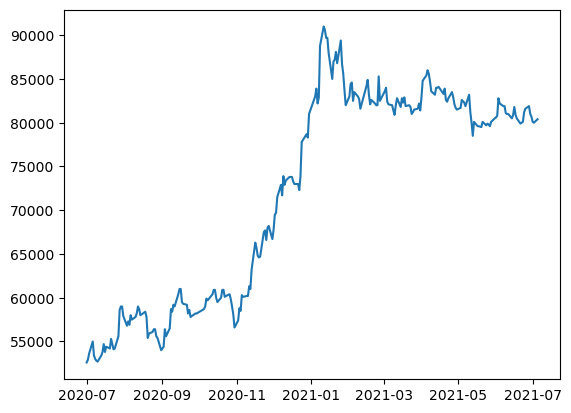

In [9]:
import matplotlib.pyplot as plt

plt.plot(dataframe['종가'])
plt.show()

### 수정주가 옵션을 이용해서 카카오🍫의 주식을 불러오자 
얼마전에 카카오가 주식을 분할했다.

이때 올바른 주식 그래프를 그리기 위해서는 **수정주가** 적용이 필요하다.

우선 카카오의 주식 데이터를 불러오자

In [10]:
krx.search('카카오')

('카카오', 'KR7035720002', '035720')

카카오


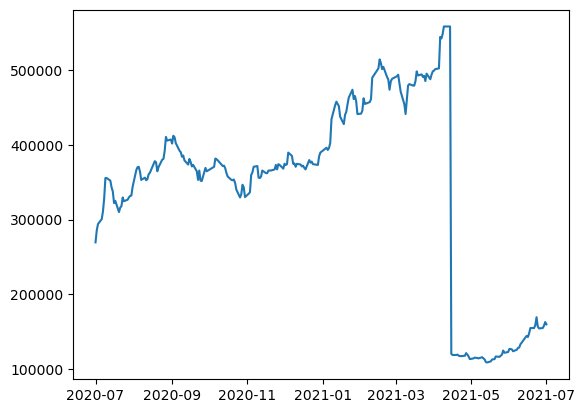

In [11]:
dataframe = krx.read('035720', start='2020-07-01', end='2021-07-01', kor=True)
plt.plot(dataframe['종가'])
plt.show()

수정 주가를 적용하지 않을때 이런 그래프모양을 볼 수 있다. <br>
이제 수정 주가를 적용해서 그래프를 그려보자

### adjust=True

카카오


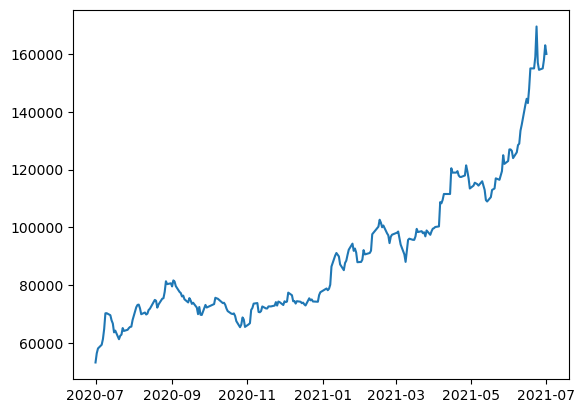

In [12]:
dataframe = krx.read('035720', start='2020-07-01', end='2021-07-01', kor=True, adjust=True)
plt.plot(dataframe['종가'])
plt.show()

### 해당일의 주식 데이터를 가져와보자
가끔 어떤 날의 상장 주식 종목이나 주가를 알고 싶을 때가 있다. <br>
그럴 때 read_date 를 사용할 수 있다.

### read_date
read_date(self, date=None, *, kind="stock", api=False, **kwargs)

-    date : str

            조회하고자 하는 데이터의 조회일.
            형태는 YYYY-MM-DD가 되어야 한다.
            예) 2021-06-01
            
-    kind : str, default "stock"


            조회하고자 하는 데이터의 종류.

             'stock' : 주식
             'per' : PER/EPS/배당금 등
             'index': 지수
             'other_index' : 기타 지수         
             'etf': ETF
             'etn': ETN
             'elw': ELW
        
-    kwargs

     - division : str
    
            조회하고자 하는 데이터의 세부 구분
            other_index : ['선물지수', '옵션지수', '전략지수', '상품지수']
     - reverse : bool, default false
    
            dataframe을 거꾸로 정렬하기
     - kor : bool, default false
    
           columns를 한글로 받아오기
     - adjust : bool, default false
    
            수정주가 적용하기



In [14]:
dataframe = krx.read_date('2021-03-01', kor=True )
dataframe

,종목코드,종목명,시장구분,소속부,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,060310,3S,KOSDAQ,중견기업부,0,0,0,0,0,0,0,0,0,44802511
1,095570,AJ네트웍스,KOSPI,,0,0,0,0,0,0,0,0,0,46822295
2,006840,AK홀딩스,KOSPI,,0,0,0,0,0,0,0,0,0,13247561
3,054620,APS홀딩스,KOSDAQ,중견기업부,0,0,0,0,0,0,0,0,0,20394221
4,265520,AP시스템,KOSDAQ,우량기업부,0,0,0,0,0,0,0,0,0,14480227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,000547,흥국화재2우B,KOSPI,,0,0,0,0,0,0,0,0,0,153600
2542,000545,흥국화재우,KOSPI,,0,0,0,0,0,0,0,0,0,768000
2543,003280,흥아해운,KOSPI,,0,0,0,0,0,0,0,0,0,116732559
2544,037440,희림,KOSDAQ,중견기업부,0,0,0,0,0,0,0,0,0,13922475


위 데이터를 보면 상장주식수 말고는 다른 숫자데이터는 모두 0으로 나온다.

그 이유는 **조회한 날짜가 공휴일**이기 때문이다.<br>

이처럼 공휴일, 주말 등은 **주식시장이 열리지 않기 때문에** 이렇게 데이터가 나오지 않는다. <br>

그래서 이를 주의해야 한다.

In [15]:
dataframe = krx.read_date('2021-03-03', kor=True )
dataframe

,종목코드,종목명,시장구분,소속부,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,060310,3S,KOSDAQ,중견기업부,2410,35,1.47,2375,2430,2370,146580,352937215,107974051510,44802511
1,095570,AJ네트웍스,KOSPI,,3970,0,0.00,4000,4000,3935,14248,56384865,185884511150,46822295
2,006840,AK홀딩스,KOSPI,,31400,1200,3.97,30400,31550,29900,96031,2981767450,415973415400,13247561
3,054620,APS홀딩스,KOSDAQ,중견기업부,7710,-180,-2.28,7860,7860,7630,197848,1524869260,157239443910,20394221
4,265520,AP시스템,KOSDAQ,우량기업부,29850,1950,6.99,28350,29850,28250,745697,21748352100,432234775950,14480227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,000547,흥국화재2우B,KOSPI,,19700,200,1.03,19650,19850,19600,243,4767900,3025920000,153600
2542,000545,흥국화재우,KOSPI,,7120,-100,-1.39,7150,7160,7090,6206,44239500,5468160000,768000
2543,003280,흥아해운,KOSPI,,258,0,0.00,0,0,0,0,0,30117000222,116732559
2544,037440,희림,KOSDAQ,중견기업부,4250,55,1.31,4195,4250,4180,20503,86439380,59170518750,13922475


휴일이 아닌 날을 조회하면 정상적인 값들을 볼 수 있다.

### ETF를 불러오자



> 💡 **Info** <br> `ETF` 뿐만 아니라 주식을 제외한 `ETN`, `ELW`, `PER`, `index`, `per` 등의 상품들도 다음과 같이 조회할 수 있다.


ETF도 주식과 마찬가지로 종목코드가 있다. 따라서 ETF의 종목코드를 먼저 불러오자

In [2]:
krx.search('나스닥기술', kind='etf')

('ARIRANG 미국나스닥기술주', 'KR7287180004', '287180')

위에서 보는 바와 같이 주식을 제외한 다른 금융상품들은 `kind` 인수를 넣어주어야 한다. read 함수를 쓸때도 마찬가지다

In [3]:
dataframe = krx.read('287180', kind='etf', start='2021-01-01', end='2021-07-01')
dataframe

ARIRANG 미국나스닥기술주


close change change_ratio       NAV   open   high    low volume  \
                                                                              
2021-07-01  23020    150         0.66  22992.88  22880  23025  22870  18151   
2021-06-30  22870     45         0.20  22956.50  22865  23155  22825  89193   
2021-06-29  22825    390         1.74  22837.23  22575  22915  22575  35087   
2021-06-28  22435      5         0.02  22490.05  22430  22555  22365   7901   
2021-06-25  22430     30         0.13  22439.04  22510  22595  22360  44748   
...           ...    ...          ...       ...    ...    ...    ...    ...   
2021-01-08  19630    595         3.13  19619.43  19440  19790  19440  37531   
2021-01-07  19035     50         0.26  18955.77  18985  19205  18935  30523   
2021-01-06  18985    100        -0.52  19225.74  19715  19715  18975  18340   
2021-01-05  19085     35        -0.18  19054.30  18995  19115  18960  12585   
2021-01-04  19120     30        -0.16  19158.03  19300  19300  19050  18296   

           trading_value   market_cap   Net Assets shares_outstanding  \
                                                                        
2021-07-01     417127085  29926000000  26441816772            1300000   
2021-06-30    2046890495  29731000000  26399972873            1300000   
2021-06-29     799583330  29672500000  26262811311            1300000   
2021-06-28     177369010  29165500000  29237061455            1300000   
2021-06-25    1003085835  29159000000  29170746982            1300000   
...                  ...          ...          ...                ...   
2021-01-08     738128170  17667000000  17657490675             900000   
2021-01-07     581771565  17131500000  17060190480             900000   
2021-01-06     350602190  17086500000  17303166561             900000   
2021-01-05     239870605  17176500000  17148868444             900000   
2021-01-04     349801875  17208000000  17242229126             900000   

                             Fundamental_index                                
                                    index_name    close  change change_ratio  
2021-07-01  NASDAQ 100 Technology Sector Index  8607.37   73.84        -0.85  
2021-06-30  NASDAQ 100 Technology Sector Index  8681.21   40.19        -0.46  
2021-06-29  NASDAQ 100 Technology Sector Index  8721.40   64.01         0.74  
2021-06-28  NASDAQ 100 Technology Sector Index  8657.39  148.55         1.75  
2021-06-25  NASDAQ 100 Technology Sector Index  8508.84    1.77        -0.02  
...                                        ...      ...     ...          ...  
2021-01-08  NASDAQ 100 Technology Sector Index  7751.66   80.90         1.05  
2021-01-07  NASDAQ 100 Technology Sector Index  7670.76  243.58         3.28  
2021-01-06  NASDAQ 100 Technology Sector Index  7427.18  117.74        -1.56  
2021-01-05  NASDAQ 100 Technology Sector Index  7544.92   81.74         1.10  
2021-01-04  NASDAQ 100 Technology Sector Index  7463.18   66.66        -0.89  

[124 rows x 16 columns]

ETF도 주식과 마찬가지로 read_date를 써서 특정일에 상장된 ETF 상품들의 지표들을 알아볼 수 있다.

In [5]:
krx.read_date('2021-03-03', kind='etf')

symbol                name   close change change_ratio        NAV   open  \
                                                                                
0    152100         ARIRANG 200   42975    510         1.20   43038.63  42505   
1    295820     ARIRANG 200동일가중   10965    160         1.48   10954.04  10825   
2    253150   ARIRANG 200선물레버리지   48770   1110         2.33   48704.75  47440   
3    253160  ARIRANG 200선물인버스2X    4150   -100        -2.35    4151.05   4325   
4    278420     ARIRANG ESG우수기업    9050    170         1.91    9049.92   8880   
..      ...                 ...     ...    ...          ...        ...    ...   
468  152870              파워 200   43535    535         1.24   43587.81  42995   
469  192720          파워 고배당저변동성   28900    670         2.37   28923.46  28405   
470  176710            파워 중기국고채  101815     50         0.05  101837.46      0   
471  140950           파워 코스피100   33080    455         1.39   33160.44  32630   
472  215620        흥국 S&P코리아로우볼   10910    185         1.72   10996.88      0   

      high    low  volume trading_value    market_cap    Net Assets  \
                                                                      
0    42975  42260  181693    7743289310  812227500000  813430038087   
1    10965  10815      32        348420    4386000000    4381616468   
2    48770  47080    2685     128566885   14631000000   12176186984   
3     4325   4150  135276     571040965   15977500000   15566425822   
4     9050   8860    2134      19146700    4072500000    4072462846   
..     ...    ...     ...           ...           ...           ...   
468  43535  42855     260      11204630   19590750000   28332074721   
469  28900  28375    1519      43589000    6936000000    6941629705   
470      0      0       0             0    6108900000    6110247386   
471  33080  32550      44       1445245   14555200000   14590594024   
472      0      0       0             0    7527900000    7587849861   

    shares_outstanding  Fundamental_index                                 
                               index_name     close  change change_ratio  
0             18900000            코스피 200    420.27    5.47         1.32  
1               400000     코스피 200 동일가중지수   2359.37   35.33         1.52  
2               300000       코스피 200 선물지수   2096.96   22.00         1.06  
3              3850000       코스피 200 선물지수   2096.96   22.00         1.06  
4               450000    WISE ESG우수기업 지수   1219.77   22.12         1.85  
..                 ...                ...       ...     ...          ...  
468             450000            코스피 200    420.27    5.47         1.32  
469             240000      코스피 200 고배당지수   2817.22   54.18         1.96  
470              60000    KTB INDEX(시장가격)  10779.63    6.47         0.06  
471             440000            코스피 100   3215.74   42.26         1.33  
472             690000  S&P Korea 저변동성 지수   8858.61  159.49         1.83  

[473 rows x 18 columns]

## 비트코인을 불러오자 using BinanceReader 🪙

비트코인은 BinanceReader() 에서 불러온다

### read
read(self, symbol, start, end, interval, **kwargs):


- symbol : str, optional
            
        Binance Symbol

- interval : str, optional
  
      조회 간격 설정
        (1m, 3m, 5m, 15m, 30m, 1h, 2h, 4h, 6h, 8h, 12h, 1d, 3d, 1w, 1M)
-    start : str

            조회하고자 하는 데이터의 시작일.
            형태는 YYYY-MM-DD가 되어야 한다. 
            예) 2021-06-01
-    end : str

            조회하고자 하는 데이터의 종료일.
            형태는 YYYY-MM-DD가 되어야 한다.
            예) 2021-06-01


In [16]:
from coredotfinance.data import BinanceReader
binance = BinanceReader()

비트코인도 주식과 마찬가지로 `symbol`, `start`, `end` 값을 넣어준다.

차이점은 `interval` 이라는 인수를 넣어주는 것인데 이는 조회 간격을 설정하는 것이다.

우선 bitcoin의 심볼을 불러와보자

### symbol_list

In [22]:
binance.symbol_list()[10:20]

['BNBETH',
 'BTCUSDT',
 'ETHUSDT',
 'HSRBTC',
 'OAXETH',
 'DNTETH',
 'MCOETH',
 'ICNETH',
 'MCOBTC',
 'WTCBTC']

비트코인의 심볼에는 규칙이 있다.

**찾고자 하는 비트코인의 약어** + **가격 기준** 이다.

'BNBETH' 같은 경우를 보면 찾고자 하는 코인은 **BNB** 코인이고 이 코인이 **ETH** 코인의 가격에 비해 얼마정도로 거래되고 있는가 하는 것이다.

비트코인이 실제 달러 대비 얼마정도 하는지는 'BTCUSDT'를 보면 된다.

**USDT**는 테더에서 발행하는 스테이블 코인으로 1 USDT == 1 USD 를 추종하는 코인으로

기준 화폐의 가치를 추종함으로써 달러 가치의 기준을 가져온다.

In [25]:
dataframe = binance.read('BTCUSDT', start='2020-06-01', end='2021-06-01', interval='1d')
dataframe

BTCUSDT


,open,high,low,close,volume
일시,,,,,
2021-06-01,37253.82,37894.81,35666.00,36693.09,81234.663770
2021-05-31,35641.26,37499.00,34153.84,37253.81,94160.735289
2021-05-30,34605.15,36488.00,33379.00,35641.27,73535.386967
2021-05-29,35661.79,37338.58,33632.76,34605.15,112663.092689
2021-05-28,38529.99,38877.83,34684.00,35663.49,135377.629720
...,...,...,...,...,...
2020-06-05,9788.14,9854.75,9581.00,9621.16,47788.050050
2020-06-04,9666.32,9881.63,9450.00,9789.06,57456.100969
2020-06-03,9518.02,9690.00,9365.21,9666.24,46252.644939


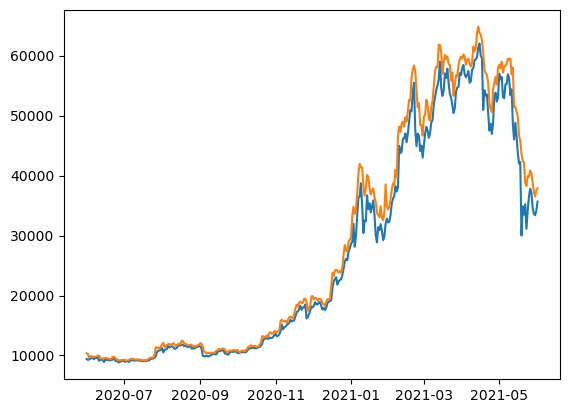

In [28]:
plt.plot(dataframe['low'])
plt.plot(dataframe['high'])
plt.show()

그래프를 보니 21년 5월에 비트코인 투자자들은 아주 힘든 시기를 보냈을 것이다.

21년 5월의 데이터 `interval` 을 조절해서 다시 그래프를 그려보자

BTCUSDT


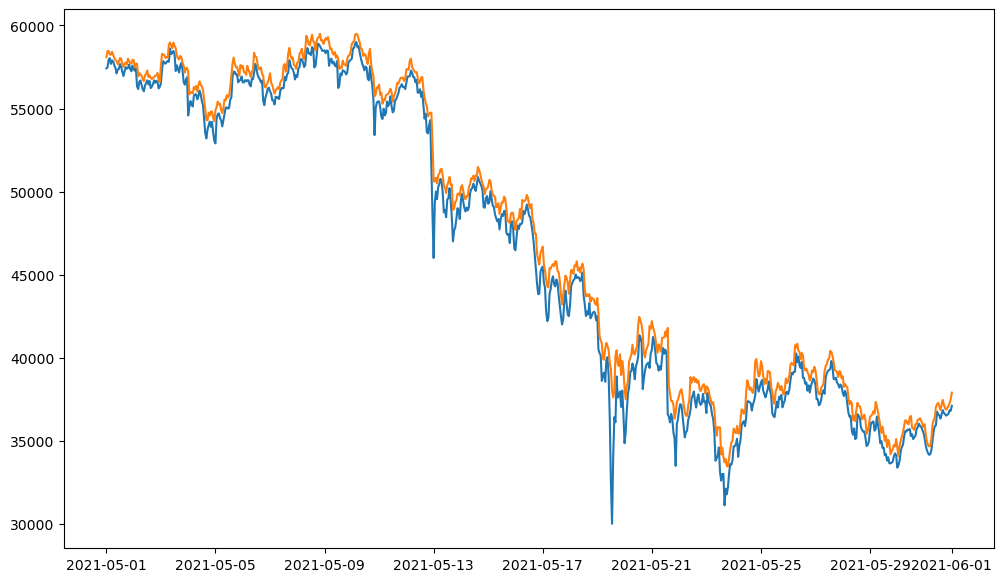

In [32]:
dataframe = binance.read('BTCUSDT', start='2021-05-01', end='2021-06-01', interval='1h')
plt.figure(figsize=(12,7))
plt.plot(dataframe['low'])
plt.plot(dataframe['high'])
plt.show()

그래프를 보니 21년 5월 17일부터 21일 사이에 비트코인 투자자들은 아주 힘든 시기를 보냈을 것이다.

21년 5월 17일부터 21일 사이의 데이터 `interval`을 조절해서 다시 그래프를 그려보자

BTCUSDT


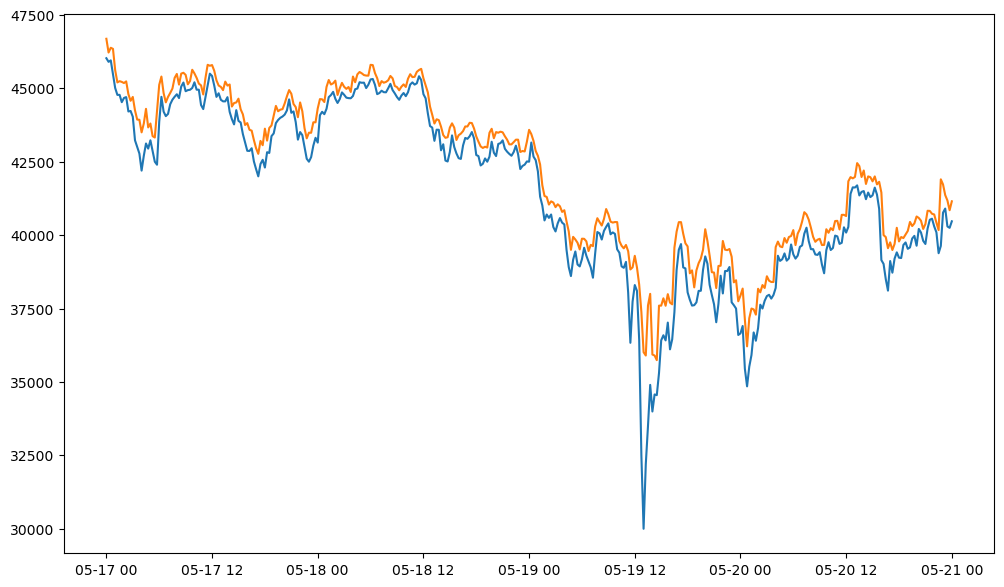

In [33]:
dataframe = binance.read('BTCUSDT', start='2021-05-17', end='2021-05-21', interval='15m')
plt.figure(figsize=(12,7))
plt.plot(dataframe['low'])
plt.plot(dataframe['high'])
plt.show()

그래프를 보니 21년 5월 19일에 비트코인 투자자들은 아주 힘든 시기를 보냈을 것이다.

21년 5월 19일의 데이터 interval을 조절해서 다시 그래프를 그려보자

BTCUSDT


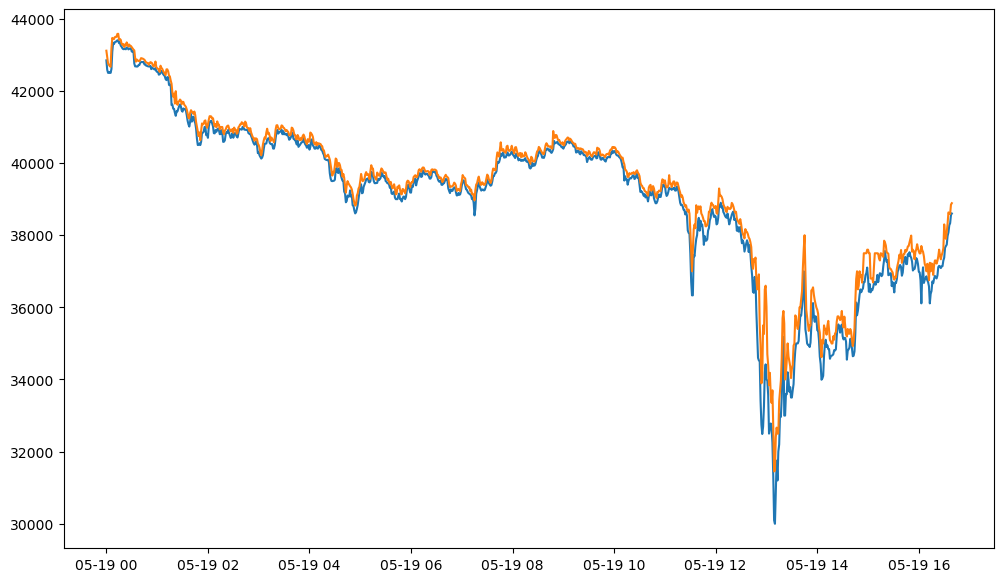

In [34]:
dataframe = binance.read('BTCUSDT', start='2021-05-19', end='2021-05-20', interval='1m')
plt.figure(figsize=(12,7))
plt.plot(dataframe['low'])
plt.plot(dataframe['high'])
plt.show()